![gradient-credit-report-concept_23-2149157684](gradient-credit-report-concept_23-2149157684.avif)


# Credit Approval Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


## The story behind The Data

Credit score cards are a common risk control method in the financial industry. 
The industry uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. 
The bank is able to decide whether to issue a credit card to the applicant. 
Credit scores can objectively quantify the magnitude of risk. 
As such, in this scenario, our bank HereIsTheMoney would like to find out what are the main factors that allow them to approve or deny a credit card to a client, and ultimately have an automated logic to identify these cases before they come to light, thus saving costs as well as increasing its reputation at the same time.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce1b7bae3ed7c45449f75)**

# Data Description
In this task, few datasets are provided:

1. **`application_record.csv` -** this file contains appliers personal information, which you could use as features for data enrichment, in order to get better insights on the business use-case. The file contains ~438K records, and 18 columns.
The relevant columns this file has are:

	- `ID` - client number. Unique identifier for the customer holding the account
    - `AMT_INCOME_TOTAL` - annual income
    - `NAME_INCOME_TYPE` - income category
    - `NAME_EDUCATION_TYPE` - education level
    - `NAME_FAMILY_STATUS` - martial status
    - `NAME_HOUSING_TYPE` - way of living
    - `DAYS_BIRTH` - Count backwards from current day (0), -1 means yesterday
    - `DAYS_EMPLOYED` - Start date of employment; Count backwards from current day(0). If positive, person unemployed.
    - `OCCUPATION_TYPE` - Occupation
    
2. **`credit_record.csv` -** contains records users transactions of credit card. This dataset contains ~200K transactions, and has 3 columns:

    - `ID` - Client number
    - `MONTHS_BALANCE` - Record month; The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
    - `STATUS` - Status; A mapping column between a numerical value, and a range of time past due. Specifically - 0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month X: No loan for the month

3. **`enriched_demographics_client.csv`** - this dataset contains some additional demographic information about each client. Specifically, it contains:
 
     - `ID` - Client number
     - `CODE_GENDER` - M (male) / F (female) of the client’s identity
     - `CNT_CHILDREN` - number of children
     - `CNT_FAM_MEMBERS` - Family size

4. ****`enriched_flags_client.csv`**** - this dataset contains some additional flags about each client. Specifically, it contains:
    - `ID` - Client number
    - `FLAG_MOBIL` - Is there a mobile phone
    - `FLAG_WORK_PHONE` - Is there a work phone
    - `FLAG_PHONE` - Is there a phone
    - `FLAG_EMAIL` - Is there an email
    - `FLAG_OWN_CAR` - Y (yes) / N (no) flag indicates if the client has a car
    - `FLAG_OWN_REALTY` - Y(yes) / N (no) indicates if the client has a property

# SQL tasks

1. How many clients that have more then 2 children does the bank have?
2. What is the average family size per each occupation type (based on fam_members)?
3. Out of the men clients, what is the count of transaction that were made, per each fam_member value (hint: treat fam_members as a dimension, not a metric)?
4. The bank is interested in knowing per each “status” (see above), who are the client IDs with top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that.
5. Let’s define a new column called “has_car_and_realty”. The bank thinks these people are affluent compared to others. Its logic is as follows:
- If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
- else ⇒ 0
Once we have this column, the bank would like to know per each has_car_and_realty category:

    1. how many unique clients do we have, 
    2. as well as how many transactions each category (1, 0) have had, 
    3. and what is the ratio between the two: unique_clients / num_transactions

In [4]:
-- Start writing your SQL query here 

select a.occupation_type, round(avg(b.cnt_fam_members), 2) avg_fam_members
from application_record a
join enriched_demographics_client b on a.id = b.id
group by 1;

,occupation_type,avg_fam_members
0,Accountants,2.26
1,Cleaning staff,2.07
2,Cooking staff,2.25
3,Core staff,2.34
4,Drivers,2.41
5,High skill tech staff,2.24
6,HR staff,2.02
7,IT staff,1.97
8,Laborers,2.32
9,Low-skill Laborers,2.26


In [1]:
SELECT * FROM Application_record

,days_employed,name_family_status,days_birth,name_housing_type,id,name_education_type,occupation_type,amt_income_total,name_income_type
0,-4542,Civil marriage,-12005,Rented apartment,5008804,Higher education,None,427500.0,Working
1,-4542,Civil marriage,-12005,Rented apartment,5008805,Higher education,None,427500.0,Working
2,-1134,Married,-21474,House / apartment,5008806,Secondary / secondary special,Security staff,112500.0,Working
3,-3051,Single / not married,-19110,House / apartment,5008808,Secondary / secondary special,Sales staff,270000.0,Commercial associate
4,-3051,Single / not married,-19110,House / apartment,5008809,Secondary / secondary special,Sales staff,270000.0,Commercial associate
...,...,...,...,...,...,...,...,...,...
438552,365243,Separated,-22717,House / apartment,6840104,Secondary / secondary special,None,135000.0,Pensioner
438553,-3007,Single / not married,-15939,House / apartment,6840222,Secondary / secondary special,Laborers,103500.0,Working
438554,-372,Single / not married,-8169,With parents,6841878,Higher education,Sales staff,54000.0,Commercial associate
438555,365243,Married,-21673,House / apartment,6842765,Secondary / secondary special,None,72000.0,Pensioner


In [2]:
SELECT * FROM Credit_record

,id,months_balance,status
0,5125455,-30,0
1,5022624,-19,0
2,5126653,-44,0
3,5143589,-40,0
4,5026151,0,0
...,...,...,...
209710,5061404,-11,X
209711,5047662,-6,X
209712,5011157,-29,X
209713,5112828,-9,X


In [3]:
SELECT * FROM Enriched_demographics_client

,id,code_gender,cnt_children,cnt_fam_members
0,5008804,M,0,2
1,5008805,M,0,2
2,5008806,M,0,2
3,5008808,F,0,1
4,5008809,F,0,1
...,...,...,...,...
438552,6840104,M,0,1
438553,6840222,F,0,1
438554,6841878,F,0,1
438555,6842765,F,0,2


In [2]:
SELECT * FROM Enriched_flags_client

,id,flag_own_car,flag_own_realty,flag_mobil,flag_work_phone,flag_phone,flag_email
0,6008171,N,Y,1,0,0,0
1,6008172,N,Y,1,0,0,0
2,6008173,N,Y,1,1,0,0
3,6008174,N,Y,1,1,0,0
4,6008175,N,Y,1,1,0,0
...,...,...,...,...,...,...,...
438552,6398074,N,Y,1,1,0,0
438553,6398075,N,Y,1,1,0,0
438554,5971594,Y,N,1,1,1,0
438555,5971595,N,N,1,1,1,0


# 1. How many clients that have more than 2 children does the bank have?

- There are 6075 clients with more than 2 children

In [10]:
SELECT COUNT(cnt_children) 
FROM Enriched_demographics_client
WHERE cnt_children > 2


,count
0,6075


# 2. What is the average family size per each occupation type (based on fam_members)?



In [12]:
SELECT occupation_type, AVG(cnt_fam_members)
FROM Enriched_demographics_client ed
JOIN Application_record ar
ON ed.id = ar.id
GROUP BY 1

,occupation_type,avg
0,Accountants,2.263039
1,Cleaning staff,2.069950
2,Cooking staff,2.247215
3,Core staff,2.337068
4,Drivers,2.407358
5,High skill tech staff,2.244001
6,HR staff,2.020672
7,IT staff,1.973510
8,Laborers,2.322190
9,Low-skill Laborers,2.257944


# 3. Out of the men clients, what is the count of transaction that were made, per each fam_member value (hint: treat fam_members as a dimension, not a metric)?


In [47]:
SELECT cnt_fam_members, COUNT(*)
FROM (
SELECT cr.id, cnt_fam_members, code_gender
FROM credit_record cr
JOIN enriched_demographics_client ed
ON cr.id = ed.id
) AS transactions
WHERE code_gender = 'M'
GROUP BY 1

,cnt_fam_members,count
0,1,6502
1,2,27014
2,3,11253
3,4,6156
4,5,806
5,6,48
6,7,31
7,15,23


# 4. The bank is interested in knowing per each “status” (see above), who are the client IDs with top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that.


In [29]:
WITH client_income AS (
SELECT ar.id, amt_income_total, status
FROM Application_record ar
JOIN credit_record cr
ON ar.id = cr.id
)

SELECT status, id, amt_income_total
FROM ( 
    SELECT status, id, amt_income_total,
ROW_NUMBER() OVER(PARTITION BY status ORDER BY amt_income_total ASC) lowest,
ROW_NUMBER() OVER(PARTITION BY status ORDER BY amt_income_total DESC ) highest
FROM client_income
) AS top_id
WHERE lowest <=5 OR highest <=5
ORDER BY 1, lowest, highest DESC


,status,id,amt_income_total
0,0,5126175,27000.0
1,0,5143327,27000.0
2,0,5126174,27000.0
3,0,5126174,27000.0
4,0,5135927,29250.0
...,...,...,...
75,X,5009698,1350000.0
76,X,5009698,1350000.0
77,X,5009698,1350000.0
78,X,5009698,1350000.0


# Let’s define a new column called “has_car_and_realty”. The bank thinks these people are affluent compared to others. 

Its logic is as follows:
- If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
- else ⇒ 0
Once we have this column, the bank would like to know per each has_car_and_realty category:

    1. how many unique clients do we have, 
    2. as well as how many transactions each category (1, 0) have had, 
    3. and what is the ratio between the two: unique_clients / num_transactions



In [55]:
SELECT id, flag_own_car, flag_own_realty, 
       CASE WHEN flag_own_car = 'Y' AND flag_own_realty = 'Y' THEN 1 
       ELSE 0 
       END AS has_car_and_realty
FROM enriched_flags_client
ORDER BY 1 

,id,flag_own_car,flag_own_realty,has_car_and_realty
0,5008804,Y,Y,1
1,5008805,Y,Y,1
2,5008806,Y,Y,1
3,5008808,N,Y,0
4,5008809,N,Y,0
...,...,...,...,...
438552,7999660,N,N,0
438553,7999696,N,Y,0
438554,7999738,N,Y,0
438555,7999784,Y,Y,1


In [62]:
WITH has_car_and_realty AS (
SELECT
enriched_flags_client.ID,
(CASE WHEN FLAG_OWN_CAR = 'Y' AND FLAG_OWN_REALTY = 'Y' THEN 1 ELSE 0 END) AS has_car_and_realty
FROM enriched_flags_client
), ratio AS (
SELECT
has_car_and_realty.has_car_and_realty,
COUNT(DISTINCT credit_record.ID) AS unique_clients,
COUNT(*) AS num_trans
FROM credit_record
JOIN has_car_and_realty
ON credit_record.ID = has_car_and_realty.ID
GROUP BY has_car_and_realty.has_car_and_realty
)
SELECT
has_car_and_realty,
SUM(unique_clients) AS unique_clients,
SUM(num_trans) AS num_trans,
SUM(unique_clients) / SUM(num_trans) AS ratio
FROM ratio
GROUP BY has_car_and_realty;


,has_car_and_realty,unique_clients,num_trans,ratio
0,0,24366,116004,0.210044
1,1,8279,39512,0.209531


The SUM function is used to aggregate the values of unique_clients and num_trans by grouping on has_car_and_realty.has_car_and_realty. SUM(unique_clients) calculates the total number of unique clients among the group of clients having the same value of has_car_and_realty.has_car_and_realty. Similarly, SUM(num_trans) calculates the total number of transactions among the group of clients having the same value of has_car_and_realty.has_car_and_realty. The value of ratio is calculated as the ratio of SUM(unique_clients) to SUM(num_trans).



## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Number of bank clients
    - % of clients with higher education
    - etc.
2. **A Bar Chart**, for example, comparing the number of clients in each client segment (custom defined as a combination of demographic characteristics).
3. **A Stacked Bar Chart with Quick Table Calculation**, for example, for each Family Status comparing the ratio of car owners and non-car owners.
4. **A Highlight Table (Heatmap)**, for example, between education and income level (can be custom-defined based on Amt Income Total), where each cell corresponds to absolute or relative numbers of clients in each combination. 
5. **A Circle View** with three different values on X axis, Y axis, and Size.
6. **A Pareto Analysis** based on a custom-defined **client segment** to answer a question: Which client segments make up 80% of all client base? 
    - Segment can include values from the demographic and/or record information about the client. For example, Education | Income | Marital status | Owning a car | No children.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard.
8. At least **1 more visualization of your choice** adding value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._

# [Tableau Link](https://public.tableau.com/views/CreditApproval_16760568031970/Story1?:language=en-US&:display_count=n&:origin=viz_share_link)

_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://cms.master.school/final-project-jan23)

In [1]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from datetime import datetime

In [2]:
# Load data first and see its "head"
application_record_df = pd.read_csv("application_record.csv")
credit_record_df = pd.read_csv("credit_record.csv")
enriched_demographics_client_df = pd.read_csv("enriched_demographics_client.csv")
enriched_flags_client_df = pd.read_csv("enriched_flags_client.csv")

## Application Record DF

In [51]:
# how many unique ID in application record?
len(set(application_record_df['ID']))

438510

In [3]:
application_record_df.head(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
0,-4542,Civil marriage,-12005,Rented apartment,5008804,Higher education,NaN,427500.0,Working
1,-4542,Civil marriage,-12005,Rented apartment,5008805,Higher education,NaN,427500.0,Working
2,-1134,Married,-21474,House / apartment,5008806,Secondary / secondary special,Security staff,112500.0,Working


In [5]:
application_record_df.tail(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
438554,-372,Single / not married,-8169,With parents,6841878,Higher education,Sales staff,54000.0,Commercial associate
438555,365243,Married,-21673,House / apartment,6842765,Secondary / secondary special,NaN,72000.0,Pensioner
438556,-1201,Married,-18858,House / apartment,6842885,Secondary / secondary special,Sales staff,121500.0,Working


In [6]:
application_record_df.sample(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
61167,-233,Married,-14213,House / apartment,5197404,Secondary / secondary special,Managers,540000.0,Commercial associate
110256,-1876,Single / not married,-10775,House / apartment,5471383,Higher education,NaN,225000.0,Working
251380,-4588,Married,-11942,House / apartment,6051963,Secondary / secondary special,High skill tech staff,225000.0,Working


In [7]:
application_record_df.shape

(438557, 9)

In [8]:
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAYS_EMPLOYED        438557 non-null  int64  
 1   NAME_FAMILY_STATUS   438557 non-null  object 
 2   DAYS_BIRTH           438557 non-null  int64  
 3   NAME_HOUSING_TYPE    438557 non-null  object 
 4   ID                   438557 non-null  int64  
 5   NAME_EDUCATION_TYPE  438557 non-null  object 
 6   OCCUPATION_TYPE      304354 non-null  object 
 7   AMT_INCOME_TOTAL     438557 non-null  float64
 8   NAME_INCOME_TYPE     438557 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 30.1+ MB


In [9]:
application_record_df.describe()

,DAYS_EMPLOYED,DAYS_BIRTH,ID,AMT_INCOME_TOTAL
count,438557.000000,438557.000000,4.385570e+05,4.385570e+05
mean,60563.675328,-15997.904649,6.022176e+06,1.875243e+05
std,138767.799647,4185.030007,5.716370e+05,1.100869e+05
min,-17531.000000,-25201.000000,5.008804e+06,2.610000e+04
25%,-3103.000000,-19483.000000,5.609375e+06,1.215000e+05
50%,-1467.000000,-15630.000000,6.047745e+06,1.607805e+05
75%,-371.000000,-12514.000000,6.456971e+06,2.250000e+05
max,365243.000000,-7489.000000,7.999952e+06,6.750000e+06


In [10]:
application_record_df.isnull().sum()

DAYS_EMPLOYED               0
NAME_FAMILY_STATUS          0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
ID                          0
NAME_EDUCATION_TYPE         0
OCCUPATION_TYPE        134203
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
dtype: int64

In [11]:
application_record_df.duplicated().sum()

0

### Application Record Summary

- 438510 unique ids
- 438557 entries
- 9 columns
- OCCUPATION_TYPE        134203 null values

## Credit Record DF

In [52]:
# how many unique ID in credit record?
len(set(credit_record_df['ID']))

41628

In [6]:
credit_record_df.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5105451,-28,X
1,5022297,-8,0
2,5053982,-13,C


In [7]:
credit_record_df.tail(3)

,ID,MONTHS_BALANCE,STATUS
209712,5150419,-13,C
209713,5095217,-9,0
209714,5012325,-15,X


In [8]:
credit_record_df.sample(3)

,ID,MONTHS_BALANCE,STATUS
185881,5116621,-21,C
191269,5051107,-26,0
148351,5052684,-20,C


In [9]:
credit_record_df.shape

(209715, 3)

In [10]:
credit_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209715 entries, 0 to 209714
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              209715 non-null  int64 
 1   MONTHS_BALANCE  209715 non-null  int64 
 2   STATUS          209715 non-null  object
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
credit_record_df.describe()

,ID,MONTHS_BALANCE
count,2.097150e+05,209715.000000
mean,5.068317e+06,-19.148621
std,4.618943e+04,14.019924
min,5.001712e+06,-60.000000
25%,5.023661e+06,-29.000000
50%,5.062089e+06,-17.000000
75%,5.113884e+06,-7.000000
max,5.150487e+06,0.000000


In [12]:
credit_record_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [13]:
credit_record_df.duplicated().sum()

0

### Credit Record Summary

- 41628 unique ids
- 209715 entries
- 3 columns
- no null values found

## Enriched Demographic Clients DF

In [14]:
enriched_demographics_client_df.head(3)

,ID,CODE_GENDER,CNT_CHILDREN,CNT_FAM_MEMBERS
0,5008804,M,0,2
1,5008805,M,0,2
2,5008806,M,0,2


In [16]:
enriched_demographics_client_df.tail(3)

,ID,CODE_GENDER,CNT_CHILDREN,CNT_FAM_MEMBERS
438554,6841878,F,0,1
438555,6842765,F,0,2
438556,6842885,F,0,2


In [19]:
enriched_demographics_client_df.sample(3)

,ID,CODE_GENDER,CNT_CHILDREN,CNT_FAM_MEMBERS
212167,5942722,M,1,2
92915,5372089,M,0,2
242705,6024265,F,0,2


In [20]:
enriched_demographics_client_df.shape

(438557, 4)

In [21]:
enriched_demographics_client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               438557 non-null  int64 
 1   CODE_GENDER      438557 non-null  object
 2   CNT_CHILDREN     438557 non-null  int64 
 3   CNT_FAM_MEMBERS  438557 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 13.4+ MB


In [22]:
enriched_demographics_client_df.describe()

,ID,CNT_CHILDREN,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,438557.000000
mean,6.022176e+06,0.427390,2.194465
std,5.716370e+05,0.724882,0.897207
min,5.008804e+06,0.000000,1.000000
25%,5.609375e+06,0.000000,2.000000
50%,6.047745e+06,0.000000,2.000000
75%,6.456971e+06,1.000000,3.000000
max,7.999952e+06,19.000000,20.000000


In [23]:
enriched_demographics_client_df.isnull().sum()

ID                 0
CODE_GENDER        0
CNT_CHILDREN       0
CNT_FAM_MEMBERS    0
dtype: int64

In [26]:
enriched_demographics_client_df.duplicated().sum()

8

### Enriched Demographic Client Summary

- 438557 entries
- 4 columns
- 8 duplicates

## Enriched Flags Client DF

In [4]:
enriched_flags_client_df.head(3)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
0,5008804,Y,Y,1,1,0,0
1,5008805,Y,Y,1,1,0,0
2,5008806,Y,Y,1,0,0,0


In [4]:
enriched_flags_client_df.tail(3)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
438554,6841878,N,N,1,1,0,0
438555,6842765,N,Y,1,0,0,0
438556,6842885,N,Y,1,0,1,0


In [5]:
enriched_flags_client_df.sample(3)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
319461,6264435,N,Y,1,0,0,0
240864,6022038,N,Y,1,0,0,0
373275,6575996,Y,Y,1,0,0,1


In [46]:
enriched_flags_client_df.shape

(438557, 7)

In [47]:
enriched_flags_client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               438557 non-null  int64 
 1   FLAG_OWN_CAR     438557 non-null  object
 2   FLAG_OWN_REALTY  438557 non-null  object
 3   FLAG_MOBIL       438557 non-null  int64 
 4   FLAG_WORK_PHONE  438557 non-null  int64 
 5   FLAG_PHONE       438557 non-null  int64 
 6   FLAG_EMAIL       438557 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 23.4+ MB


In [48]:
enriched_flags_client_df.describe()

,ID,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
count,4.385570e+05,438557.0,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,1.0,0.206133,0.287771,0.108207
std,5.716370e+05,0.0,0.404527,0.452724,0.310642
min,5.008804e+06,1.0,0.000000,0.000000,0.000000
25%,5.609375e+06,1.0,0.000000,0.000000,0.000000
50%,6.047745e+06,1.0,0.000000,0.000000,0.000000
75%,6.456971e+06,1.0,0.000000,1.000000,0.000000
max,7.999952e+06,1.0,1.000000,1.000000,1.000000


In [49]:
enriched_flags_client_df.isnull().sum()

ID                 0
FLAG_OWN_CAR       0
FLAG_OWN_REALTY    0
FLAG_MOBIL         0
FLAG_WORK_PHONE    0
FLAG_PHONE         0
FLAG_EMAIL         0
dtype: int64

In [50]:
enriched_flags_client_df.duplicated().sum()

4

### Enriched Flags Client Summary

- 438557 entries
- 7 columns
- No null values found
- 4 duplicates

# Assesing the Data

1. Fix birth day column for readability 
2. Create age column
3. Drop null values in the occupation_type column
4. Create age bin
5. Rename columns

In [3]:
# Make copies

app_rec_df = application_record_df.copy()
credit_record_df = credit_record_df.copy()
enriched_dem_df = enriched_demographics_client_df.copy()
enriched_flags_df = enriched_flags_client_df.copy()


## 1. Fix birth day column for readability 

In [4]:
bir = app_rec_df.copy()

In [5]:
# # Calculate the birth date
current_date = pd.to_datetime('today')
bir['BIRTH_DATE'] = current_date + pd.to_timedelta(bir['DAYS_BIRTH'], unit='D')

# Convert the birth date to a string
bir['BIRTH_DATE'] = bir['BIRTH_DATE'].dt.strftime('%Y-%m-%d')



In [6]:
bir.sample(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,BIRTH_DATE
64881,365243,Married,-22062,House / apartment,5224288,Secondary / secondary special,NaN,135000.0,Pensioner,1962-09-22
269352,-3340,Single / not married,-21674,House / apartment,6087800,Secondary / secondary special,Cleaning staff,157500.0,Working,1963-10-15
176760,-822,Civil marriage,-16044,House / apartment,5825900,Secondary / secondary special,Drivers,157500.0,Commercial associate,1979-03-15


## 2. Create age column

In [7]:
# Make copy
age = bir.copy()

In [8]:
# Calculate age by subtracting birth date from the current date
now = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
age['age'] = (now - pd.to_datetime(bir['BIRTH_DATE'])).astype('<m8[Y]')

# Round the age to the nearest integer
age['age'] = age['age'].round().astype(int)

age.sample(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,BIRTH_DATE,age
329051,-454,Separated,-9677,Rented apartment,6317514,Secondary / secondary special,Core staff,157500.0,Working,1996-08-19,26
400249,-3175,Married,-10196,House / apartment,6742163,Higher education,Managers,292500.0,State servant,1995-03-19,27
145003,365243,Married,-19046,House / apartment,6569057,Secondary / secondary special,NaN,148500.0,Pensioner,1970-12-25,52


## 3. Drop null values in the occupation_type column

In [9]:
# Make copy
oc_null_values = age.copy()

In [10]:
oc_null_values.dropna(subset=['OCCUPATION_TYPE'], inplace=True)

oc_null_values.sample(5)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,BIRTH_DATE,age
178368,-2027,Married,-11744,Municipal apartment,5833236,Higher education,Core staff,135000.0,State servant,1990-12-22,32
94527,-186,Married,-9554,House / apartment,5384675,Higher education,Core staff,337500.0,Commercial associate,1996-12-20,26
46941,-926,Married,-10656,House / apartment,5142974,Secondary / secondary special,Laborers,180000.0,Working,1993-12-14,29
81541,-2021,Married,-12730,House / apartment,6007277,Secondary / secondary special,Cleaning staff,270000.0,Working,1988-04-10,34
304780,-1021,Single / not married,-8642,House / apartment,6213301,Incomplete higher,Sales staff,112500.0,Working,1999-06-20,23


In [11]:
oc_null_values.isnull().sum()

DAYS_EMPLOYED          0
NAME_FAMILY_STATUS     0
DAYS_BIRTH             0
NAME_HOUSING_TYPE      0
ID                     0
NAME_EDUCATION_TYPE    0
OCCUPATION_TYPE        0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
BIRTH_DATE             0
age                    0
dtype: int64

## 4. Create age bin 

In [12]:
# Make copy
age_bin = oc_null_values.copy()

In [13]:
# Whats the age range to create an age bin?
sorted_ages = age_bin['age'].sort_values()
sorted_ages


238       20
332505    21
405895    21
405894    21
425595    21
          ..
137847    67
137846    67
137845    67
188467    67
188472    67
Name: age, Length: 304354, dtype: int64

In [14]:
print(age_bin['age'].unique())


[58 52 46 48 29 27 34 32 56 43 44 45 33 42 37 57 51 54 39 28 30 24 20 38
 40 36 35 41 26 53 50 25 22 23 47 31 49 59 60 55 62 64 21 63 61 66 67 65]


In [15]:
bins = [0, 18, 25, 35, 60, 100]
labels = ['<18', '18-24', '25-34', '35-59', '>60']
age_bin['age_bin'] = pd.cut(age_bin['age'], bins, labels=labels)
age_bin.sample(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,BIRTH_DATE,age,age_bin
273947,-2930,Married,-10048,House / apartment,6099177,Secondary / secondary special,Core staff,135000.0,Working,1995-08-14,27,25-34
285553,-283,Single / not married,-11000,House / apartment,6132762,Higher education,Sales staff,180000.0,Working,1993-01-04,30,25-34
174703,-1522,Single / not married,-12657,House / apartment,6048495,Secondary / secondary special,Laborers,652500.0,Working,1988-06-22,34,25-34


## 5. Rename columns

In [16]:
# Make copy
rename_columns = age_bin.copy()

In [17]:
rename_columns.rename(columns={'age': 'AGE',
                              'age_bin': 'AGE_BIN'}, inplace=True)
rename_columns.sample(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,BIRTH_DATE,AGE,AGE_BIN
13178,-3384,Married,-12566,House / apartment,5228962,Higher education,Core staff,270000.0,Commercial associate,1988-09-21,34,25-34
331335,-425,Civil marriage,-17606,House / apartment,6346597,Secondary / secondary special,Laborers,189000.0,Working,1974-12-04,48,35-59
213307,-551,Married,-13799,House / apartment,5944745,Secondary / secondary special,Medicine staff,157500.0,State servant,1985-05-07,37,35-59


## Merge dataset

In [18]:
# Make copy
df_app_rec = rename_columns.copy()


In [19]:
result = df_app_rec.merge(credit_record_df, on='ID')
result = result.merge(enriched_dem_df, on='ID')
result = result.merge(enriched_flags_df, on='ID')
result.sample(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,BIRTH_DATE,AGE,AGE_BIN,MONTHS_BALANCE,STATUS,CODE_GENDER,CNT_CHILDREN,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
39339,-3680,Married,-14434,House / apartment,5054276,Secondary / secondary special,Secretaries,292500.0,State servant,1983-08-11,39,35-59,-25,X,F,0,2,N,N,1,0,1,0
9376,-1674,Married,-15262,House / apartment,5022730,Secondary / secondary special,Managers,360000.0,Commercial associate,1981-05-05,41,35-59,-59,0,M,3,5,Y,N,1,0,0,0
81573,-679,Civil marriage,-13735,Municipal apartment,5115561,Secondary / secondary special,Laborers,121500.0,Commercial associate,1985-07-10,37,35-59,-7,X,F,0,2,N,N,1,1,0,0


In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107666 entries, 0 to 107665
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   DAYS_EMPLOYED        107666 non-null  int64   
 1   NAME_FAMILY_STATUS   107666 non-null  object  
 2   DAYS_BIRTH           107666 non-null  int64   
 3   NAME_HOUSING_TYPE    107666 non-null  object  
 4   ID                   107666 non-null  int64   
 5   NAME_EDUCATION_TYPE  107666 non-null  object  
 6   OCCUPATION_TYPE      107666 non-null  object  
 7   AMT_INCOME_TOTAL     107666 non-null  float64 
 8   NAME_INCOME_TYPE     107666 non-null  object  
 9   BIRTH_DATE           107666 non-null  object  
 10  AGE                  107666 non-null  int64   
 11  AGE_BIN              107666 non-null  category
 12  MONTHS_BALANCE       107666 non-null  int64   
 13  STATUS               107666 non-null  object  
 14  CODE_GENDER          107666 non-null  object  
 15  

# Exploratory and Data Analysis

## Whats the Number of Applicants by Age Bin?

In [21]:
result.AGE_BIN.value_counts()

35-59    70454
25-34    33070
18-24     2782
>60       1360
<18          0
Name: AGE_BIN, dtype: int64

Text(0.5, 1.0, 'Number of Applicants by Age Bin')

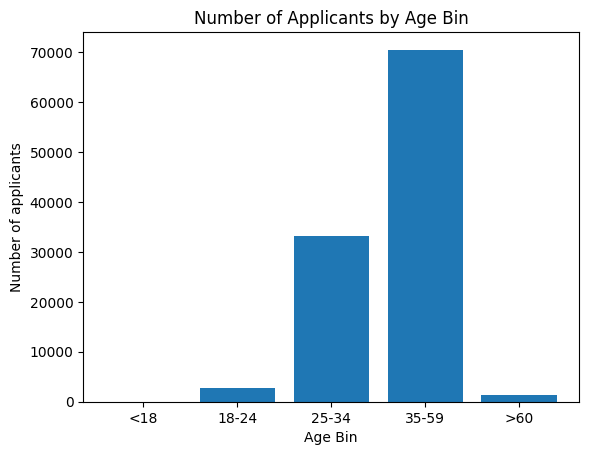

In [22]:
age_group = result.groupby(['AGE_BIN']).size().reset_index(name='counts')
plt.bar(age_group['AGE_BIN'], age_group['counts'])
plt.xlabel('Age Bin')
plt.ylabel('Number of applicants')
plt.title('Number of Applicants by Age Bin')


- We can observe a higher amount of applicants in the 35-59 age range as there 70454 people. This is followed by 33070 applicants in the age range of 25-34.

## Whats the distribution of age and average?

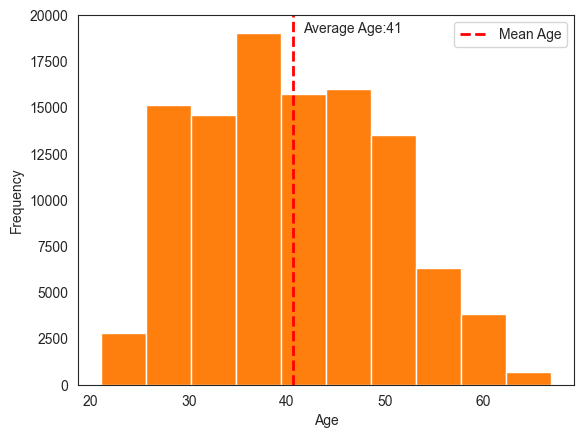

In [23]:
sns.set_style('white')
# Plot the histogram of the distribution of age
plt.hist(result['AGE'], bins=20, alpha=0.7)

# Calculate the mean age
mean_age = np.mean(result['AGE'])

# Add a red line to represent the mean age
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)

plt.text(mean_age + 1, max(plt.hist(result.AGE, density=False)[0]), 'Average Age:{:.0f}'.format(mean_age))

# Add a legend and labels
plt.legend(['Mean Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


- We can observe that in this dataset, the age start at 20 and finish around 70 with an average age of 41.

## What's the Gender distribution?

In [24]:
gender_counts = result.CODE_GENDER.value_counts()
gender_counts

F    66912
M    40754
Name: CODE_GENDER, dtype: int64

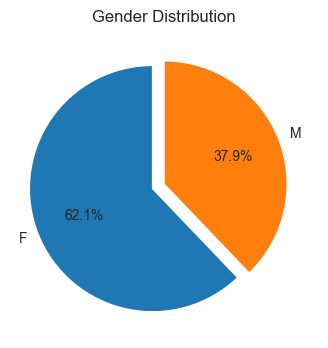

In [25]:
plt.figure(figsize=(15, 4))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0]) #colors = ['lightskyblue', 'plum']
plt.title("Gender Distribution");


- In out dataset, we have 62% females and 38% males applicants
- Females: 66912
- Males: 40754

## Whats the distribution of Family Status?

In [26]:
family_status = result.NAME_FAMILY_STATUS.value_counts()
family_status

Married                 76873
Single / not married    13404
Civil marriage           8646
Separated                6209
Widow                    2534
Name: NAME_FAMILY_STATUS, dtype: int64

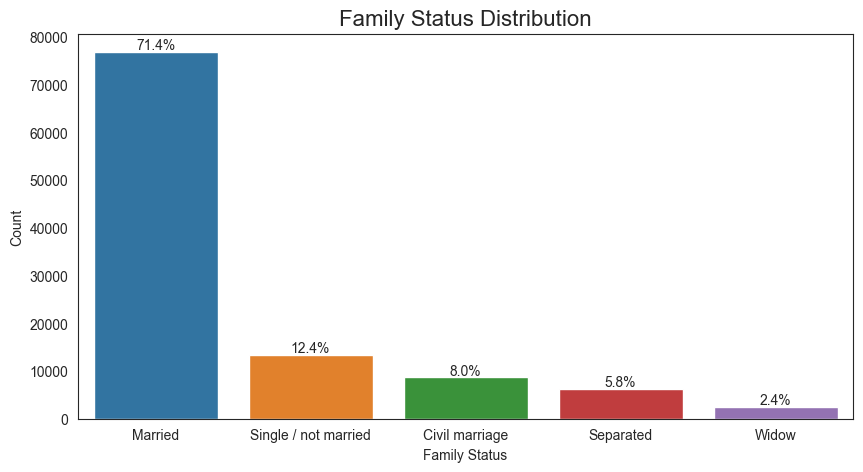

In [27]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=family_status.index, y=family_status.values)
plt.xlabel("Family Status")
plt.ylabel("Count")
plt.title("Family Status Distribution", fontsize=16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 500,
            '{:.1f}%'.format(height / len(result) * 100),
            ha="center")


- Theres a highest amount of applicants under the Married family status with a 71.4%. This is followed by Single status with a 12.4%. The depth from married and the other family status are very significant with 60% applicants of difference. 

## Whats the distribution of Housing Type?

In [28]:
housing_type = result.NAME_HOUSING_TYPE.value_counts()
housing_type

House / apartment      94979
With parents            5914
Municipal apartment     3564
Rented apartment        1705
Office apartment         879
Co-op apartment          625
Name: NAME_HOUSING_TYPE, dtype: int64

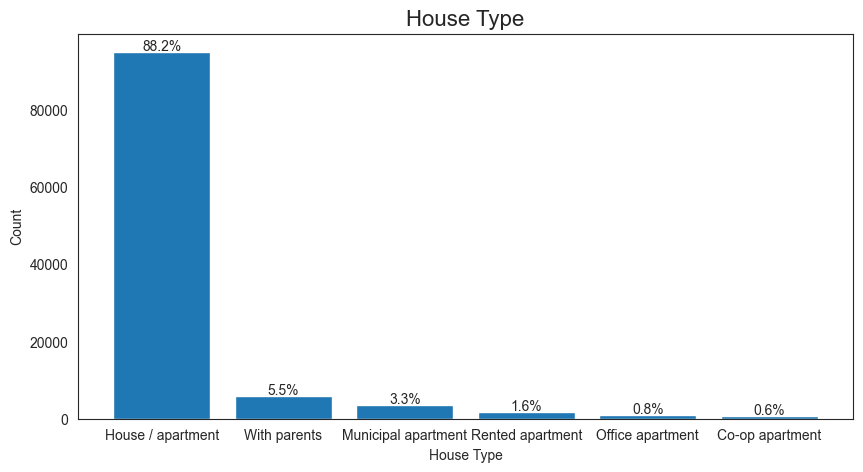

In [29]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
plt.bar(housing_type.index, housing_type.values)

# Add percentage values on top of the bars
for i, value in enumerate(housing_type.values):
    plt.text(i, value+500, f"{value/len(result)*100:.1f}%", ha='center')

plt.xlabel("House Type")
plt.ylabel("Count")
plt.title("House Type", fontsize=16)
plt.show()


- In the previous plot, we can observe that "house/apartment" type has over 88% of applicants compared to the other house type where theres only 6% (5000k) or less of applicants. 

## What's the distribution of education type?

In [30]:
education = result.NAME_EDUCATION_TYPE.value_counts()
education

Secondary / secondary special    71581
Higher education                 30955
Incomplete higher                 4129
Lower secondary                    922
Academic degree                     79
Name: NAME_EDUCATION_TYPE, dtype: int64

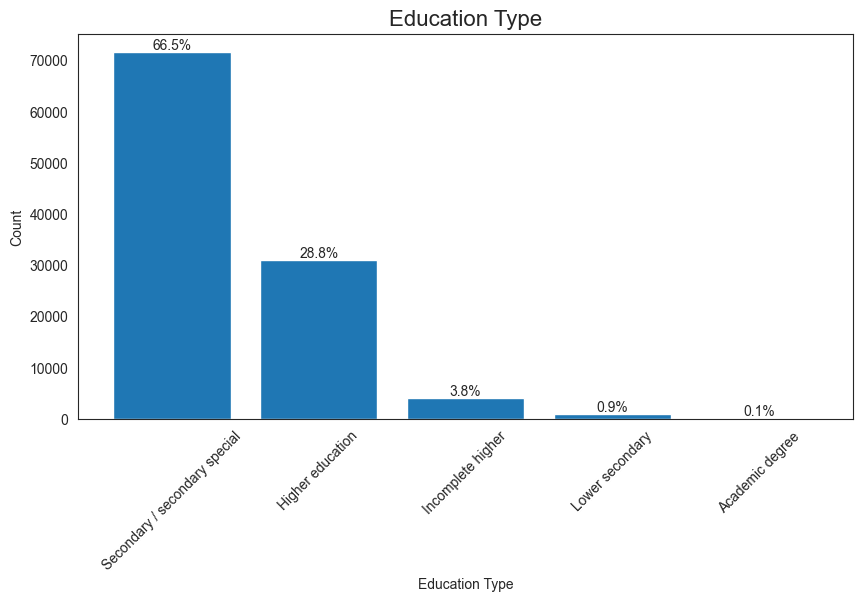

In [31]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
plt.bar(education.index, education.values)

# Add percentage values on top of the bars
for i, value in enumerate(education.values):
    plt.text(i, value+500, f"{value/len(result)*100:.1f}%", ha='center')

plt.xlabel("Education Type")
plt.ylabel("Count")
plt.title("Education Type", fontsize=16)
plt.xticks(rotation=45)
plt.show()

- In the previous plot, we can see the distribution of education type and we have 67% of applicants with Secondary / secondary special education. With highest education, we have 29% of applicants. The other education types is composed of less than 4000 applicants. 

## What's the distribution of Occupation Type?

In [32]:
occ_type = result.OCCUPATION_TYPE.value_counts()
occ_type

Laborers                 26026
Core staff               15580
Sales staff              14063
Managers                 13694
Drivers                   9529
High skill tech staff     6358
Accountants               5553
Medicine staff            5246
Cooking staff             2690
Security staff            2524
Cleaning staff            2236
Private service staff     1374
Low-skill Laborers         755
Secretaries                652
Waiters/barmen staff       499
HR staff                   344
IT staff                   283
Realty agents              260
Name: OCCUPATION_TYPE, dtype: int64

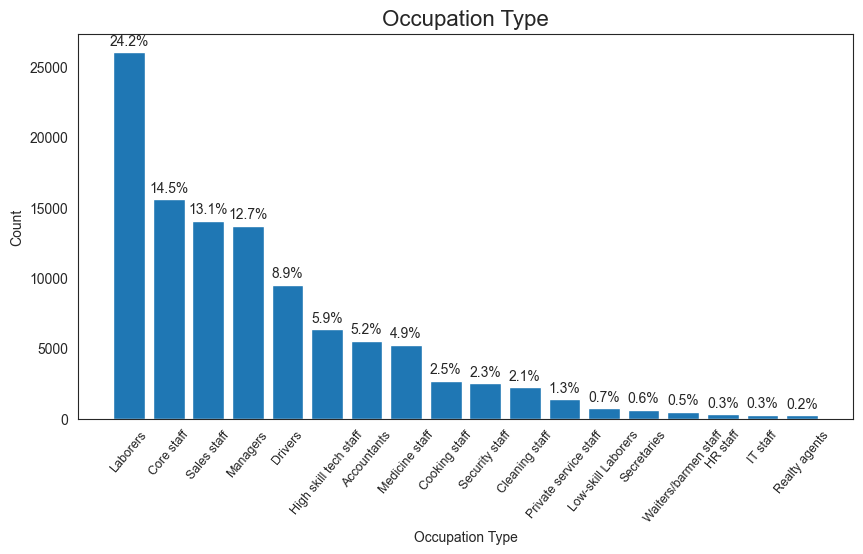

In [33]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
plt.bar(occ_type.index, occ_type.values)

# Add percentage values on top of the bars
for i, value in enumerate(occ_type.values):
    plt.text(i, value+500, f"{value/len(result)*100:.1f}%", ha='center')

plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Occupation Type", fontsize=16)
plt.xticks(fontsize=9)
plt.xticks(rotation=50)
plt.show()

- In our dataset, the most popular occupation type is "Laborers" with a 24% and its being followed by "Core staff" and "sales staff" with an approximate of 14%. Every other occupation type listed is less than 13%. 

## What's the distribution of Income Type?

In [34]:
inc_type = result.NAME_INCOME_TYPE.value_counts()
inc_type

Working                 66638
Commercial associate    30234
State servant           10661
Student                    70
Pensioner                  63
Name: NAME_INCOME_TYPE, dtype: int64

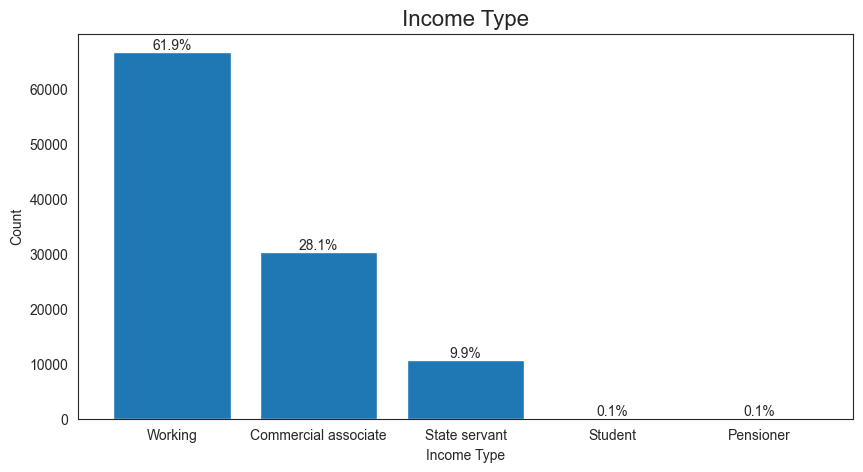

In [35]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
plt.bar(inc_type.index, inc_type.values)

# Add percentage values on top of the bars
for i, value in enumerate(inc_type.values):
    plt.text(i, value+500, f"{value/len(result)*100:.1f}%", ha='center')

plt.xlabel("Income Type")
plt.ylabel("Count")
plt.title("Income Type", fontsize=16)
plt.show()

- In our dataset, "Working" is the income type with the highest amount of applicants (62%). This makes sense as its the work class. Students and pensioners are only less than 100 applicants each. 

## What's the distribution per Status Type?

In [36]:
status_result = result.STATUS.value_counts()
status_result

C    45352
0    40305
X    20257
1     1345
5      235
2      114
3       33
4       25
Name: STATUS, dtype: int64

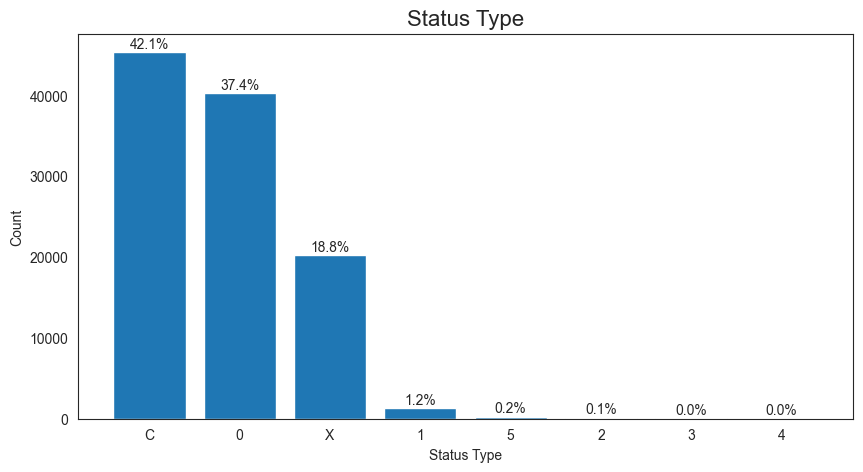

In [37]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
plt.bar(status_result.index, status_result.values)

# Add percentage values on top of the bars
for i, value in enumerate(status_result.values):
    plt.text(i, value+500, f"{value/len(result)*100:.1f}%", ha='center')

plt.xlabel("Status Type")
plt.ylabel("Count")
plt.title("Status Type", fontsize=16)
plt.show()

- In this plot, we can observe the distribution of the status column where each it represents the loan past due. 

    - 0: 1-29 days past due 
    - 1: 30-59 days past due 
    - 2: 60-89 days overdue;
    - 3: 90-119 days overdue 
    - 4: 120-149 days overdue 
    - 5: Overdue or bad debts, write-offs for more than 150 days
    - C: paid off that month 
    - X: No loan for the month
 
- We have a highest amount of applicants with no loans for the months. And we have 37% of applicants with loans past due for a month. 
- Less than 300 applicants have loans with more than 3 months due.

## What's the distribution of income by Family Status?

In [38]:
income_by_family = result.groupby('NAME_FAMILY_STATUS')['AMT_INCOME_TOTAL'].mean().reset_index()
income_by_family

,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL
0,Civil marriage,183288.705239
1,Married,197433.227245
2,Separated,208755.233371
3,Single / not married,200771.061661
4,Widow,193466.258879


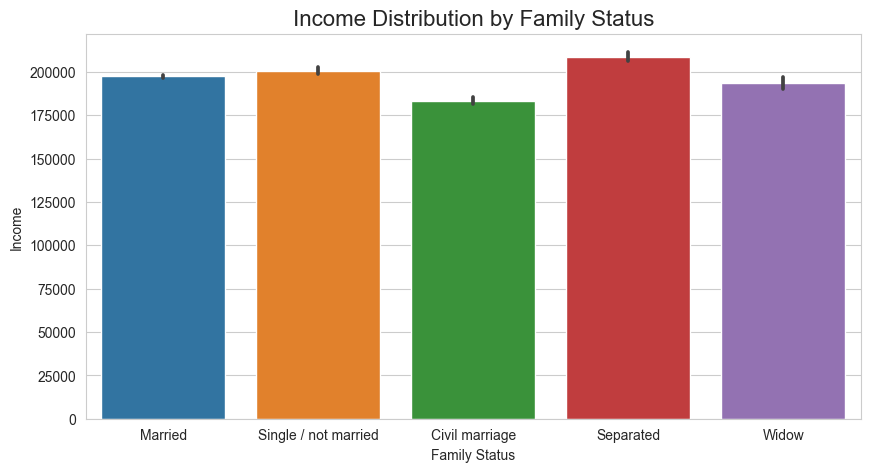

In [39]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))
sns.barplot(x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', data=result)
plt.xlabel('Family Status')
plt.ylabel('Income')
plt.title('Income Distribution by Family Status', fontsize=16)
plt.show()


- This bar plot with the x-axis showing the family status categories and the y-axis showing the income distribution, display that "Separated" families have more income compared to "Single/not married".

## Whats the average monthly balance over time?

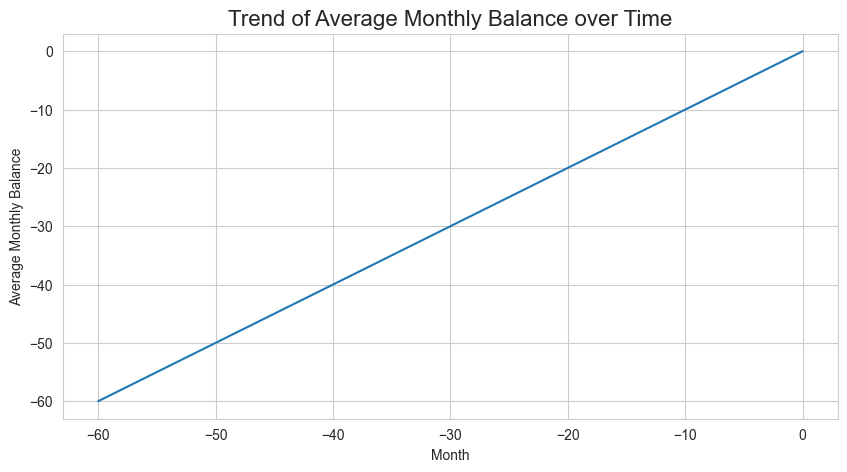

In [40]:


sns.set_style('whitegrid')

monthly_balance = result.groupby('MONTHS_BALANCE')['MONTHS_BALANCE'].mean()
plt.figure(figsize=(10, 5))
plt.plot(monthly_balance.index, monthly_balance.values)
plt.xlabel("Month")
plt.ylabel("Average Monthly Balance")
plt.title("Trend of Average Monthly Balance over Time", fontsize=16);


## What's the number of children per family status?

In [41]:
count_chd = result.groupby('NAME_FAMILY_STATUS')['CNT_CHILDREN'].mean().reset_index()
count_chd


,NAME_FAMILY_STATUS,CNT_CHILDREN
0,Civil marriage,0.452117
1,Married,0.582779
2,Separated,0.478821
3,Single / not married,0.195986
4,Widow,0.146409


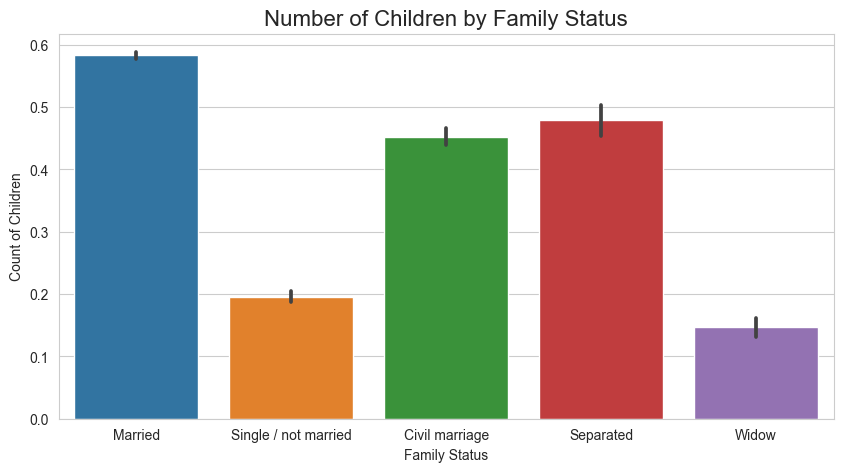

In [42]:


plt.figure(figsize=(10, 5))
sns.barplot(data=result, x='NAME_FAMILY_STATUS', y='CNT_CHILDREN')
plt.xlabel("Family Status")
plt.ylabel("Count of Children")
plt.title("Number of Children by Family Status", fontsize=16)
plt.show()


- Married families have more children than any other type of families with an approximate of 0.6. Then we have "separated" families with 0.5 children. 

## Distribution of Average Income by Family Status?

In [43]:
income_by_status = result.groupby('NAME_FAMILY_STATUS')['AMT_INCOME_TOTAL'].mean().reset_index()
income_by_status.columns = ['Family Status', 'Average Income']
income_by_status

,Family Status,Average Income
0,Civil marriage,183288.705239
1,Married,197433.227245
2,Separated,208755.233371
3,Single / not married,200771.061661
4,Widow,193466.258879


Text(0.5, 1.0, 'Average Income by Family Status')

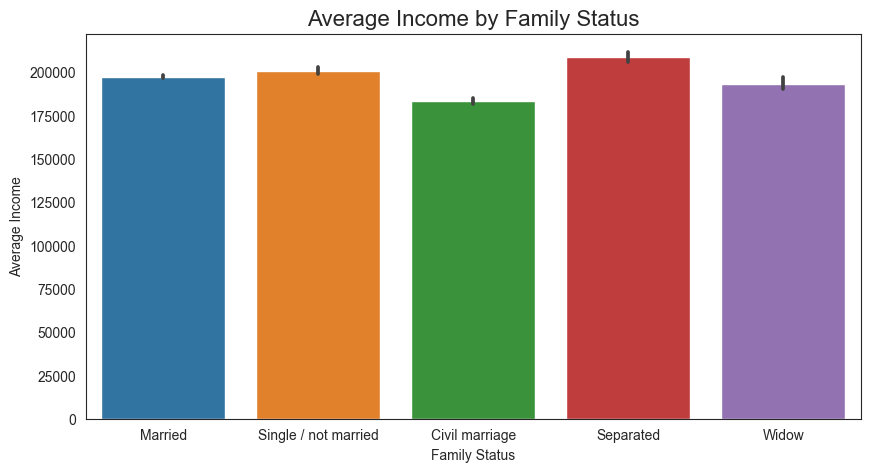

In [44]:
sns.set_style('white')
plt.figure(figsize=(10, 5))
sns.barplot(data=result, x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', estimator=np.mean)
plt.xlabel("Family Status")
plt.ylabel("Average Income")
plt.title("Average Income by Family Status", fontsize=16)



- In this barplot, we can see that "separated" families have an average income of 200k while "civil marriage" have an income of approximate 183k. 

## What's the income by Family Status and Housing Type?

In [45]:
df_housing_family_income = result.groupby(['NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS'])['AMT_INCOME_TOTAL'].mean().reset_index()
df_housing_family_income

,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL
0,Co-op apartment,Married,260582.781457
1,Co-op apartment,Separated,95142.857143
2,Co-op apartment,Single / not married,185841.346154
3,Co-op apartment,Widow,135000.000000
4,House / apartment,Civil marriage,183268.862830
5,House / apartment,Married,197438.827098
6,House / apartment,Separated,210935.399890
7,House / apartment,Single / not married,201307.940453
8,House / apartment,Widow,197346.270598
9,Municipal apartment,Civil marriage,170521.978022


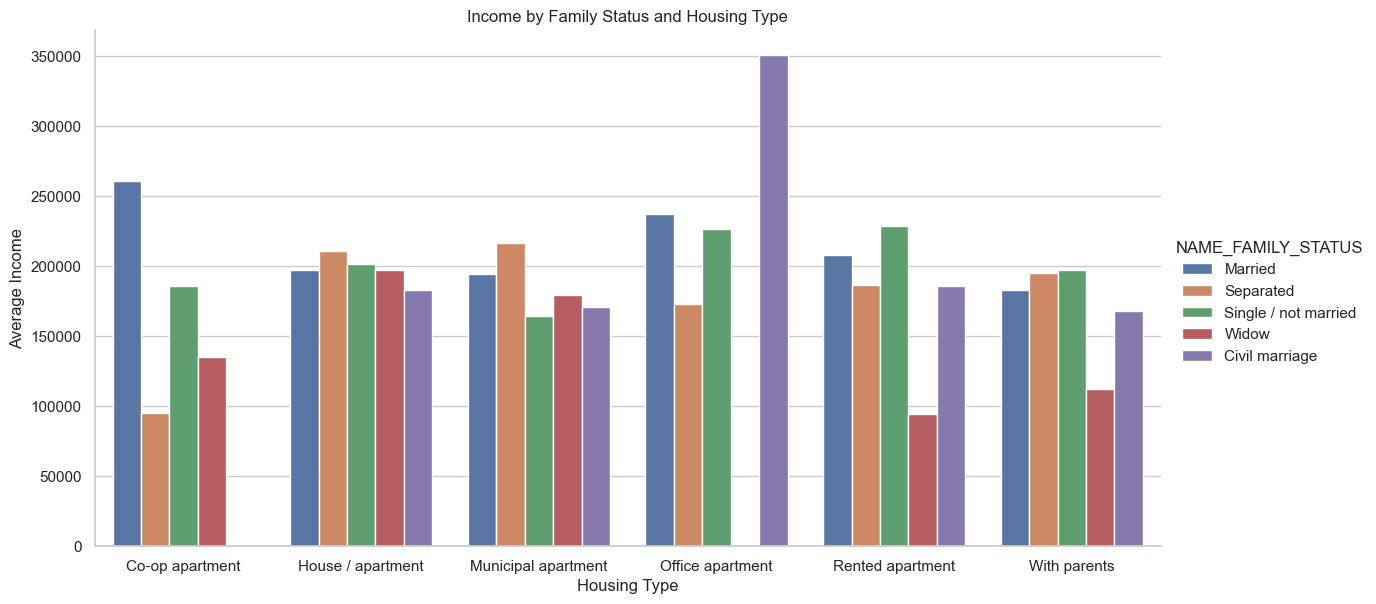

In [46]:
# Group data by NAME_HOUSING_TYPE and NAME_FAMILY_STATUS
grouped_data = result.groupby(['NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS'])['AMT_INCOME_TOTAL'].mean().reset_index()

# Create grouped bar chart
sns.set(style="whitegrid")
g = sns.catplot(x="NAME_HOUSING_TYPE", y="AMT_INCOME_TOTAL", hue="NAME_FAMILY_STATUS", data=grouped_data,
                kind="bar", height=6, aspect=2)

# Set axis labels and title
g.set(xlabel="Housing Type", ylabel="Average Income", title="Income by Family Status and Housing Type")
plt.show()

- Widow in a rented apartment has the lowest average income of 94k. And an office apartment civil marriage has an average income of a 350k. 

## What's the distribution of ownership of a car? 
## What's the income distribution by car ownership?

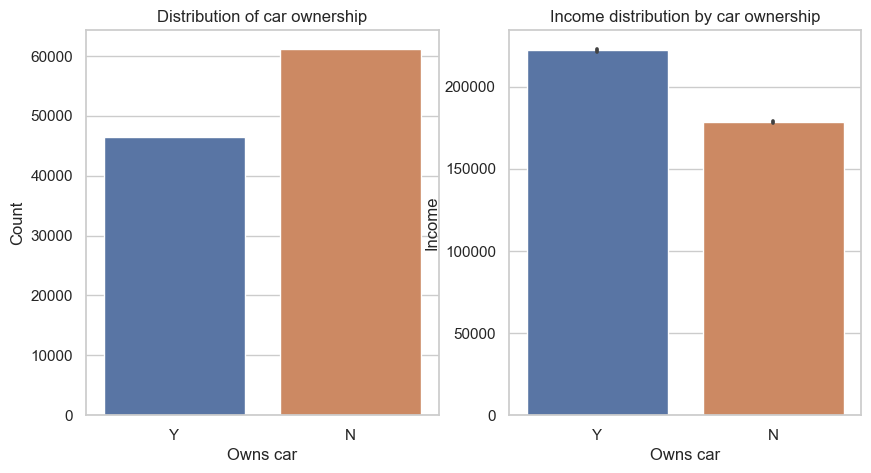

In [47]:


# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the first visualization in the left subplot
sns.countplot(data=result, x='FLAG_OWN_CAR', ax=axs[0])
axs[0].set_xlabel('Owns car')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of car ownership')

# Plot the second visualization in the right subplot
sns.barplot(data=result, x='FLAG_OWN_CAR', y='AMT_INCOME_TOTAL', ax=axs[1])
axs[1].set_xlabel('Owns car')
axs[1].set_ylabel('Income')
axs[1].set_title('Income distribution by car ownership')

plt.show()


- More than 60k applicants doesnt own a car. However, the income of the applicants who owns a car is more than 200k compared to applicants who doesnt own a car (180k).

## What's the count of car ownership per family status?

In [48]:
# count
count_car_family = result.groupby(['NAME_FAMILY_STATUS', 'FLAG_OWN_CAR']).size().reset_index(name='count')
count_car_family


,NAME_FAMILY_STATUS,FLAG_OWN_CAR,count
0,Civil marriage,N,5633
1,Civil marriage,Y,3013
2,Married,N,40234
3,Married,Y,36639
4,Separated,N,4341
5,Separated,Y,1868
6,Single / not married,N,9066
7,Single / not married,Y,4338
8,Widow,N,1953
9,Widow,Y,581


In [49]:
# percentage
perc = pd.crosstab(index=result['NAME_FAMILY_STATUS'], columns=result['FLAG_OWN_CAR'], normalize='index') * 100
perc

FLAG_OWN_CAR,N,Y
NAME_FAMILY_STATUS,,
Civil marriage,65.151515,34.848485
Married,52.338272,47.661728
Separated,69.914640,30.085360
Single / not married,67.636526,32.363474
Widow,77.071823,22.928177


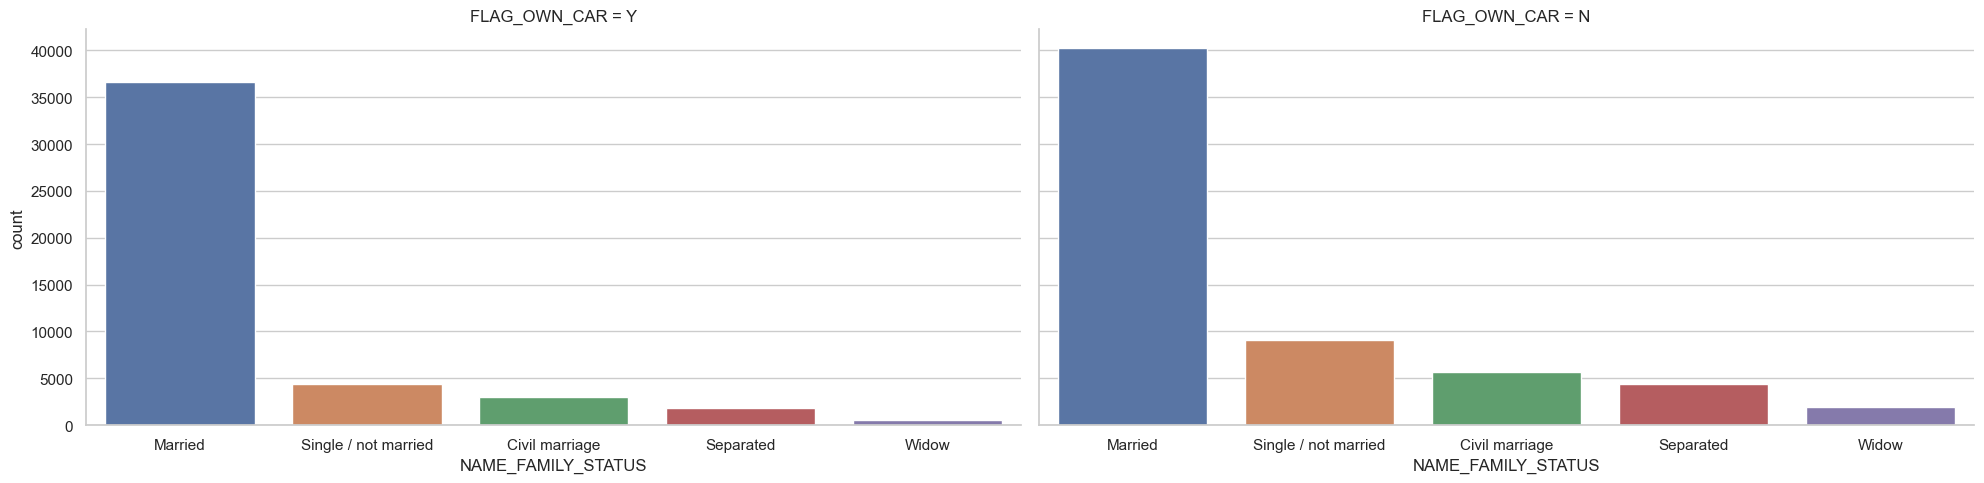

In [50]:
sns.catplot(data=result, x='NAME_FAMILY_STATUS', col='FLAG_OWN_CAR', kind='count', height=5, aspect=2)
plt.subplots_adjust(hspace=0.4)



- We can observe that theres more applicants without owning a car compared to applicants that have a car under the marriage family status with a 5 percent difference. 
- Theres as well a difference of 39% between single/not married who owns a car. 

## What's the distribution of realty ownership? 
## Whats the income distribution by realty ownership?

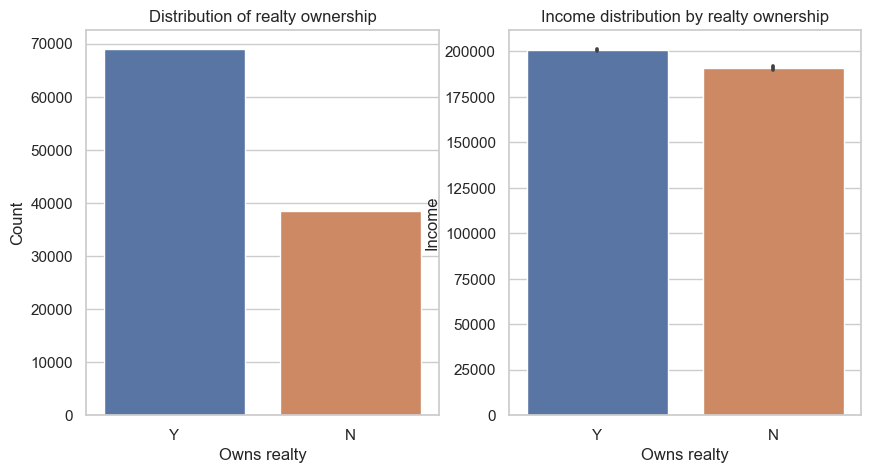

In [51]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=result, x='FLAG_OWN_REALTY', ax=axs[0])
axs[0].set_xlabel('Owns realty')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of realty ownership')

sns.barplot(data=result, x='FLAG_OWN_REALTY', y='AMT_INCOME_TOTAL', ax=axs[1])
axs[1].set_xlabel('Owns realty')
axs[1].set_ylabel('Income')
axs[1].set_title('Income distribution by realty ownership')

plt.show()


- In both barplots, we can observe that there are around 70k applicants that owns realty and have an income above the 200k. 
- However, we can observe that theres less than 40k applicants who owns realty with an average income of 180k. 

## What's the count of realty ownership per family status?

In [52]:
# count
count_realty = result.groupby(['NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY']).size().reset_index(name='count')
count_realty

,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,count
0,Civil marriage,N,3570
1,Civil marriage,Y,5076
2,Married,N,27030
3,Married,Y,49843
4,Separated,N,2354
5,Separated,Y,3855
6,Single / not married,N,4815
7,Single / not married,Y,8589
8,Widow,N,797
9,Widow,Y,1737


In [53]:
# percentage
perc_realty = pd.crosstab(index=result['NAME_FAMILY_STATUS'], columns=result['FLAG_OWN_REALTY'], normalize='index') * 100
perc_realty

FLAG_OWN_REALTY,N,Y
NAME_FAMILY_STATUS,,
Civil marriage,41.290770,58.709230
Married,35.161890,64.838110
Separated,37.912707,62.087293
Single / not married,35.922113,64.077887
Widow,31.452249,68.547751


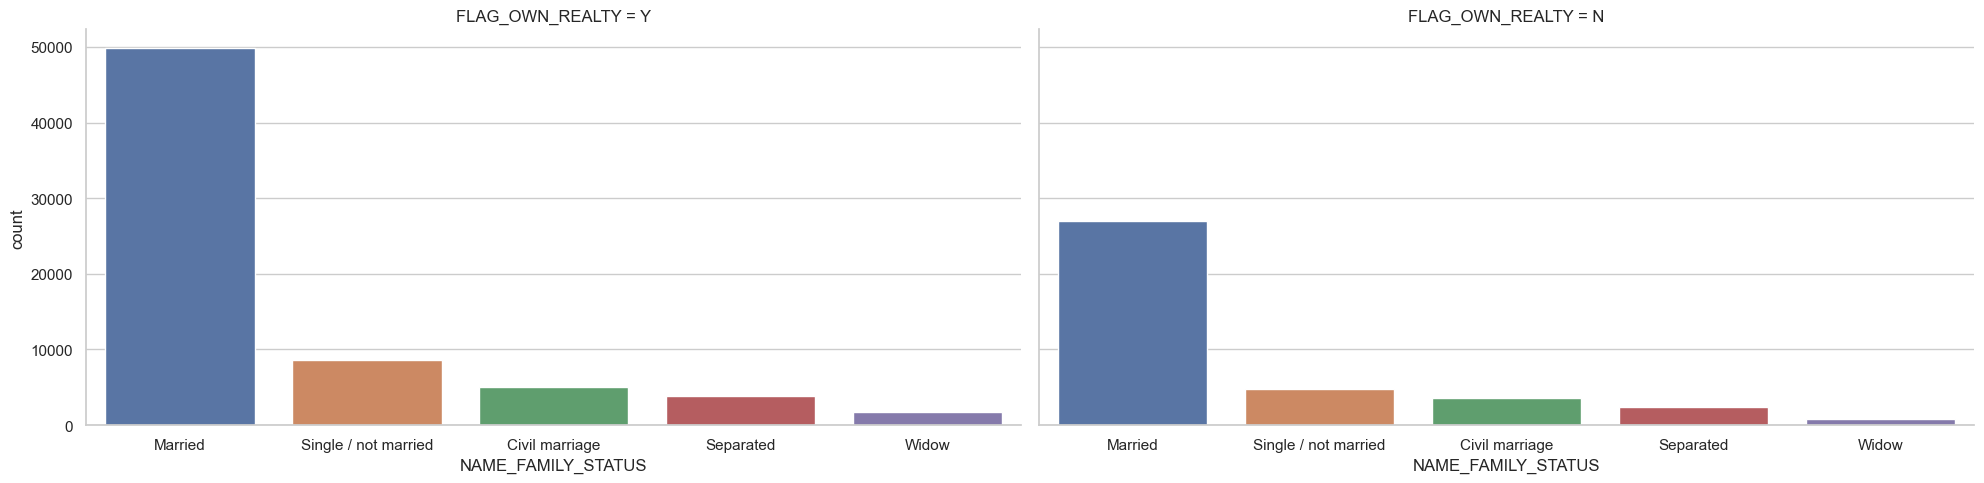

In [54]:
sns.catplot(data=result, x='NAME_FAMILY_STATUS', col='FLAG_OWN_REALTY', kind='count', height=5, aspect=2)
plt.subplots_adjust(hspace=0.4)

- We can compare in the previous plot, applicants that owns a realty vs. the ones who doesnt own a realty. There are around 50k applicants that are married and owns a realty. 
- We can observe that 27k of married applicants doesnt own a realty.
- And we have less than 8k applicants per each family status in each category of owning realty. 

## Percentage of Loan Status by Family Status

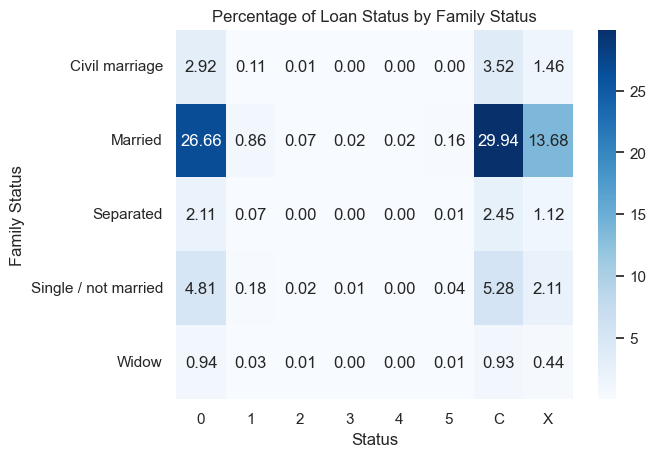

In [57]:


# Create a crosstab of NAME_FAMILY_STATUS and STATUS with percentage
dt = pd.crosstab(index=result['NAME_FAMILY_STATUS'], columns=result['STATUS'], normalize='all') * 100

# Create a heatmap of the crosstab
sns.heatmap(dt, annot=True, cmap='Blues', fmt='.2f')

# Set the axis labels and plot title
plt.xlabel('Status')
plt.ylabel('Family Status')
plt.title('Percentage of Loan Status by Family Status')

# Show the plot
plt.show()


- In this heatmap, we can compare the family status and their level os status loans owed. 
- As previously seen, we have lots of applicants who doesnt own loans. In here, we can observe that the majority of those applicants are under the "married" family status.
- The other percentage saw previously under the applicants who have around 30 days of loans owed, are under "married" family status as well. 

# Summary 

The dataset being analyzed shows that the majority of applicants fall within the 35-59 age range, with females representing 62% of the total applicants. Married family status is the most common with 71.4% of applicants, and "house/apartment" is the most popular type of housing with over 88% of applicants choosing this option. Secondary / secondary special education is the most common level of education, with 67% of applicants having this level of education. The most popular occupation type is "Laborers" with 24% of applicants. And "Working" is the most common income type with 62% of applicants falling into this category.

In terms of loan past due, the majority of applicants have no loans for the month, but 37% have loans past due for one month. There are fewer than 300 applicants with loans past due for more than three months. Separated families have the highest average income, while widow in a rented apartment has the lowest average income. Those who own a car have a higher average income than those who do not, and around 70k applicants own realty and have an income above 200k.

When comparing family status and level of loans owed, the majority of applicants who have no loans or loans past due for around 30 days fall under the "married" family status.

Overall, the analysis of the dataset reveals various patterns in the applicant's demographic, housing, education, occupation, and loan past due status. These insights can be used to develop effective strategies and policies in the financial industry.

In [58]:
# how many unique ID in application record?
len(set(application_record_df['ID']))

438510

In [59]:
# how many unique ID in credit record?
len(set(credit_record_df['ID']))

41628

In [8]:
# how many IDs do two tables share?
len(set(application_record_df['ID']).intersection(set(credit_record_df['ID'])))

32645

In [9]:
# One can think of mergine the two DFs

# df = pd.merge(application_record_df, credit_record_df, how='inner', on=['ID'])

In [10]:
# Let's see all columns after merge of two DFs
#df.columns

Index(['DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH',
       'NAME_HOUSING_TYPE', 'ID', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

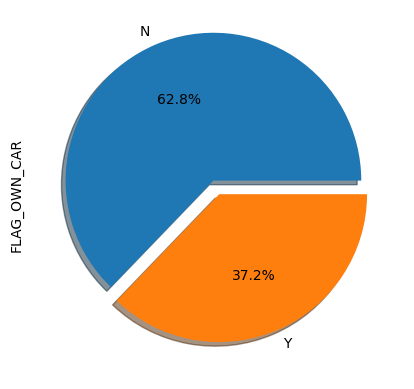

In [11]:
# enriched_flags_client_df['FLAG_OWN_CAR'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')
# Seems that ~63% of the clients doesn't own a car...

In [ ]:
# enriched_demographics_client_df['CNT_CHILDREN'].value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%')
# # ~70% doesn't have even a child

In [ ]:
# # Let's deep dive into the values
# enriched_demographics_client_df['CNT_CHILDREN'].value_counts()